In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


Load the data

In [15]:
data = pd.read_excel('dataset.xlsx')

Data Preprocessing and Cleaning

In [16]:
data = data.rename(columns = {'sex(man=1,woman=0)':'sex', 'neck circumference（cm）':'neck', 
                       'waist circumference（cm）':'waist', 
                       'maximum interincisal distance（cm）':'mid', 'Mallampati test':'Mt', 
                       'ratio of Height to thyro-sternum distance':'rhtd', 
                       'ESS questionnaire':'ESS', 'STOP-Bang questionnaire':'SB', 
                       'no or mild OSA: moderate-severe OSA(0:1)':'result'})

In [17]:
#去除Nan
data[['sex', 'age', 'neck', 'waist', 'BMI', 'mid', 'Mt', 'rhtd']].isnull().sum()

sex      0
age      0
neck     0
waist    0
BMI      0
mid      2
Mt       0
rhtd     0
dtype: int64

In [18]:
data = data.dropna(axis = 0, how = 'any')

Modelling

In [19]:
x = data[['sex', 'age', 'neck', 'waist', 'BMI', 'mid', 'Mt', 'rhtd']]
y = data['result']

In [20]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
#RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_trn, y_trn)

RandomForestClassifier()

In [22]:
y_pred = model.predict(x_tst)
matrix=confusion_matrix(y_tst,y_pred)
confusion_matrix(y_tst,y_pred)

array([[31,  8],
       [ 4, 53]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

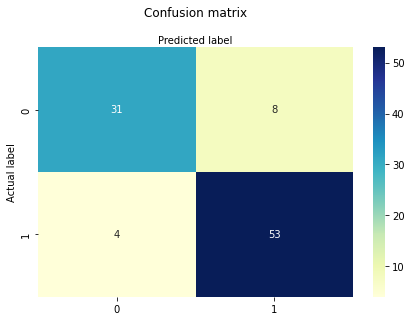

In [23]:
#混淆矩陣視覺化(Heatmap)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:

print("Macro-average: {0}".format(metrics.f1_score(y_tst, y_pred, average =
'macro' )))
print("Micro-average: {0}".format(metrics.f1_score(y_tst, y_pred, average =
'micro')))
print(metrics.classification_report(y_tst, y_pred))
print(metrics.confusion_matrix(y_tst, y_pred))

Macro-average: 0.8680714612918001
Micro-average: 0.875
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        39
           1       0.87      0.93      0.90        57

    accuracy                           0.88        96
   macro avg       0.88      0.86      0.87        96
weighted avg       0.88      0.88      0.87        96

[[31  8]
 [ 4 53]]


In [25]:
import joblib

#save to joblib model
joblib_file = "rf_joblib_model.pkl"
joblib.dump(model, joblib_file)

['rf_joblib_model.pkl']